In [0]:
%tensorflow_version 2.x

Building An Image Classifier using the Sequential API. We ll build the classifier using the Fashion MNIST Dataset Kaggle Link: https://www.kaggle.com/zalando-research/fashionmnist. This dataset is available in Keras itself. We can use it.

**Loading the Dataset**

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [35]:
#Looking at the shape and the datatype of our dataset, which has training and testing dataset already in two sets

x_train_full.shape

(60000, 28, 28)

In [36]:
x_train_full.dtype

dtype('uint8')

**Creating a validation set from the full training set and Scaling our values as we are going to use Gradient Descent to train our model**

In [0]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

**List of our class names**

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [39]:
class_names[y_train[0]]

'Coat'

**Creating the model using the Sequential API**

In [0]:
model = tf.keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                    keras.layers.Dense(300, activation="relu"),
                                    keras.layers.Dense(100, activation="relu"),
                                    keras.layers.Dense(10, activation="softmax")])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.layers

**Compiling the model**

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**Training the model**

In [44]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.7185 - accuracy: 0.7652 - val_loss: 0.5609 - val_accuracy: 0.7952
Epoch 2/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4890 - accuracy: 0.8282 - val_loss: 0.4449 - val_accuracy: 0.8506
Epoch 3/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4445 - accuracy: 0.8434 - val_loss: 0.4251 - val_accuracy: 0.8586
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4176 - accuracy: 0.8521 - val_loss: 0.4144 - val_accuracy: 0.8570
Epoch 5/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3985 - accuracy: 0.8591 - val_loss: 0.3833 - val_accuracy: 0.8630
Epoch 6/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3819 - accuracy: 0.8649 - val_loss: 0.3916 - val_accuracy: 0.8634
Epoch 7/30
55000/55000 [==============================] -

In [45]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

In [46]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

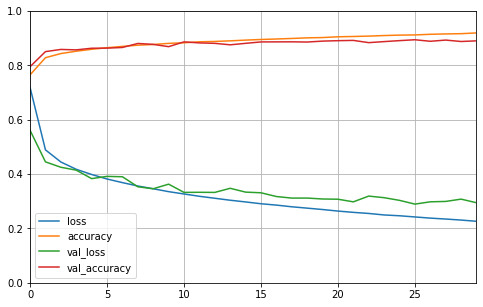

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)   #Setting the vertical range to [0-1]
plt.show

**Evaluating our Model**

In [49]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3344 - accuracy: 0.8798


[0.33436288549900056, 0.8798]

**Using the model to make predictions**

In [58]:
x_new = x_test[:8]
y_probability = model.predict(x_new)
y_probability.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [59]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6])

In [0]:
import numpy as np

In [61]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt'], dtype='<U11')

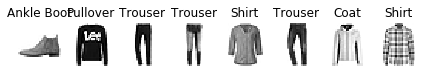

In [63]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 8, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()